In [74]:
%run utils.ipynb

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.random_projection import GaussianRandomProjection
import scipy
from numpy import linalg as LA


def reconstruction_error(data):
    n_components_range = list(range(1, data['n_features']+1))
    vals = []
    for i in n_components_range:
        rp = GaussianRandomProjection(n_components=i)
        transformed = rp.fit_transform(data['X'])
        inverse = transformed.dot(rp.components_) + np.mean(data['X'], axis = 0)
        _error = ((data['X'] - inverse)**2).mean()
        vals.append({
            'error': _error,
        })
    df = pd.DataFrame(vals)
    return df
    
def n_componets_rp(data):
    np.random.seed(5)
    X = data['X']
    y = data['y']
    dataset_name = data['name']
    n_components = data['n_features']
    n_components_range = list(range(1,n_components+1))

    rp = GaussianRandomProjection(n_components=n_components)
    rp.fit(X)

    decision_tree = DecisionTreeClassifier()
    pipe = Pipeline(steps=[('rp', rp), ('decisionTree', decision_tree)])

    fig, ax = plt.subplots()
    dfr = reconstruction_error(data)
    _reconstruction_error = dfr['error'].values
    ax.bar(n_components_range, _reconstruction_error, color='C0')
    plt.axis('tight')
    plt.xlabel('n_components')
    ax.set_ylabel('reconstruction error', color='C0')
    
    gridSearch = GridSearchCV(pipe, dict(rp__n_components=n_components_range), cv = 3)
    gridSearch.fit(X, y)
    results = gridSearch.cv_results_

    #Plotting the accuracies and best component
    ax1 = ax.twinx()
    ax1.plot(n_components_range, results['mean_test_score'], linewidth = 2, color = 'C1')
    ax1.set_ylabel('Mean Cross Validation Accuracy', color='C1')
    ax1.set_xlabel('n_components')
    best_n_component = gridSearch.best_estimator_.named_steps['rp'].n_components
    ax1.axvline(best_n_component, linestyle=':', label='n_components chosen', linewidth = 2, color='C3')

    plt.legend(prop=dict(size=12))
    plt.title('Accuracy for RP %s (best n_components=  %d)'%(dataset_name, best_n_component ))
    plt.show()

def plot_reconstruction_error(df):
    plt.plot(df['error'], label=data['name'])
    plt.legend()
    plt.title("Reconstruction error")
    plt.show()

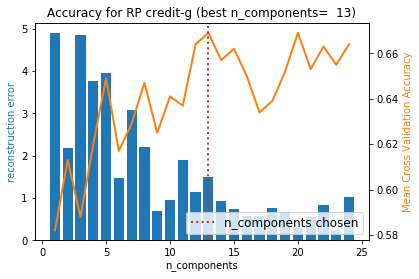

In [71]:
n_componets_rp(cdata)

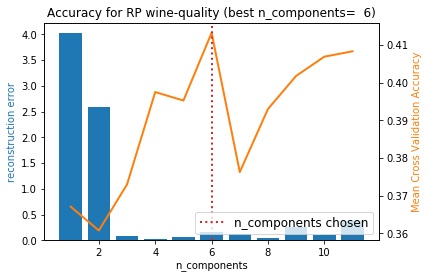

In [53]:
np.random.seed(55)
n_componets_rp(wdata)

In [75]:
wdata['rp_n'] = 6
cdata['rp_n'] = 13

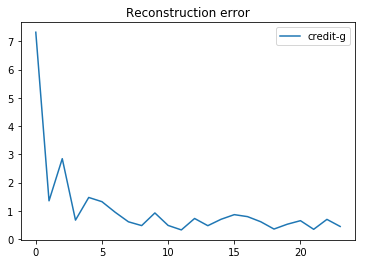

21
0


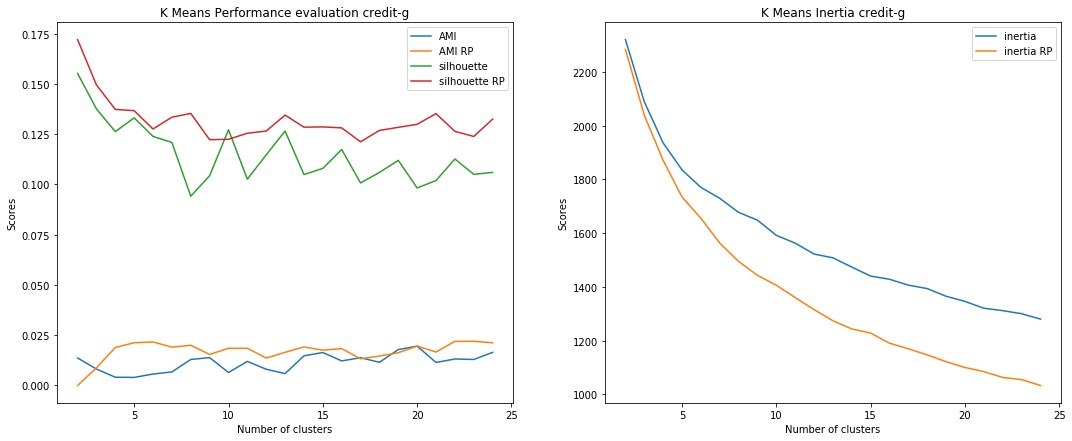

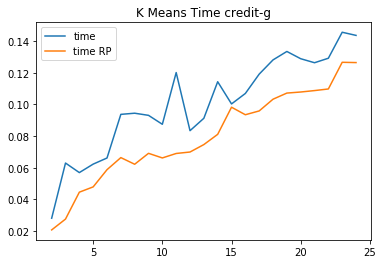

      AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
0  0.0136  0.051325  0.014546     0.527      0.014684  0.522151     0.01441   

       inertia       init  mutual_info  n_clusters  precision  recall  \
0  2320.844198  k-means++     0.008802           2   0.517391   0.527   

   silhouette      time  v-measure  
0     0.15531  0.020663   0.014546  
------
        AMI      ARI       NMI  accuracy  completeness  f1_score  homogenity  \
0 -0.000106 -0.00537  0.000678     0.269      0.000652  0.350326    0.000706   

       inertia       init  mutual_info  n_clusters  precision  recall  \
0  2284.164562  k-means++     0.000431           2   0.502133   0.269   

   silhouette      time  v-measure  
0    0.172175  0.028062   0.000678  
6
0


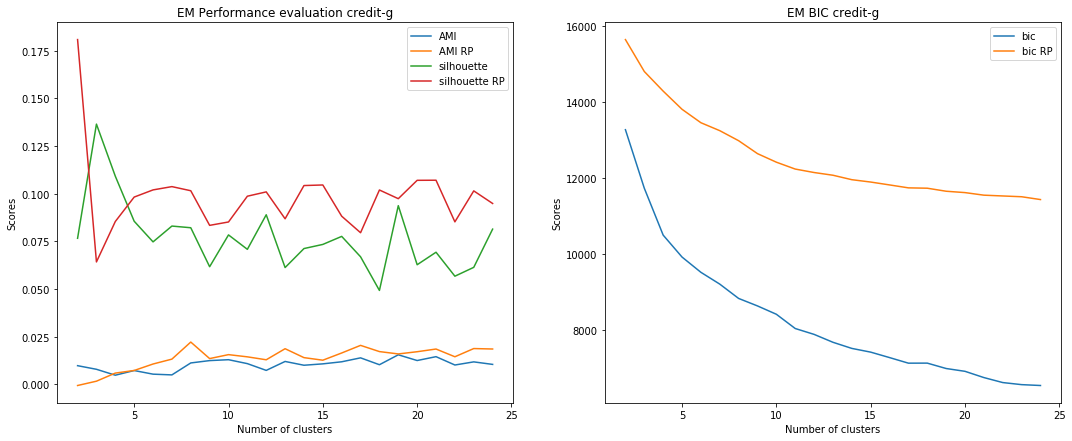

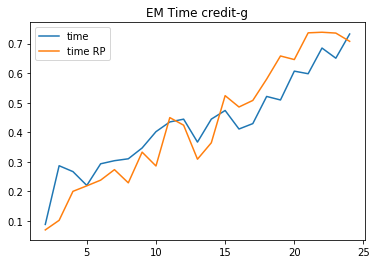

        AMI      ARI       NMI  accuracy           aic           bic  \
0  0.009766 -0.00694  0.011019     0.305  13011.834362  13262.129881   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
0      0.010504  0.388889    0.011559  gmm-em     0.007061           2   

   precision  recall  silhouette      time  v-measure  
0   0.536432   0.305    0.076612  0.069187   0.011006  
------
        AMI       ARI       NMI  accuracy           aic           bic  \
0 -0.000637 -0.003939  0.000156     0.234  15491.427356  15633.752259   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
0      0.000153  0.318058    0.000159  gmm-em     0.000097           2   

   precision  recall  silhouette      time  v-measure  
0   0.496364   0.234    0.180894  0.087763   0.000156  


In [78]:
data = cdata
method = "RP"

# Reconstruction Error
dfr = reconstruction_error(cdata)
dfr.to_csv(f"./results/rerror_{method.lower()}_{data['name']}.csv", index=False )
plot_reconstruction_error(dfr)
          
# Reduce dimension
rp = GaussianRandomProjection(n_components=data['rp_n'])
rp.fit(data['X'])
reduced_data = rp.transform(data['X'])

# Performances
n_clusters_range = list(range(2, data['n_features']+1))

## Kmeans
dfk = performance_k_means(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfk.to_csv(f"./results/km_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_k_means_perf(data, reduced_data, n_clusters_range, method=method)

## EM
dfe = performance_em(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfe.to_csv(f"./results/em_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_em_perf(data, reduced_data, n_clusters_range, method=method)

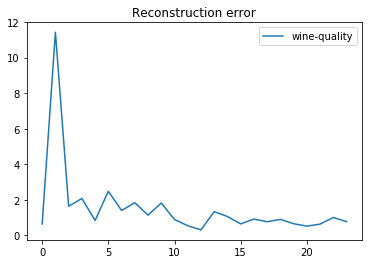

1
0


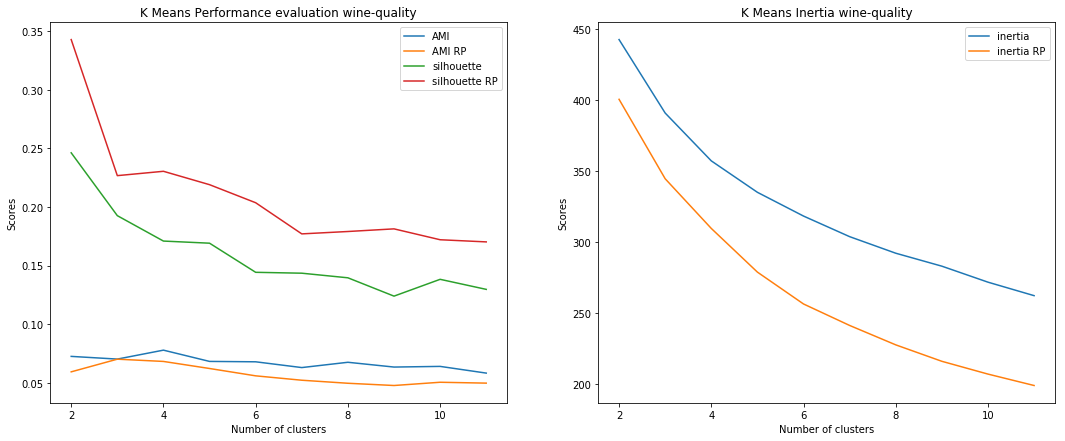

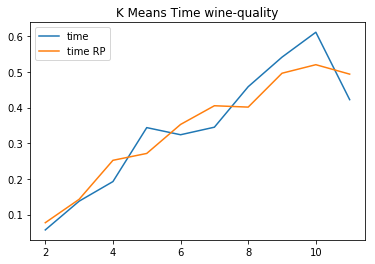

        AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
5  0.062941  0.042266  0.078396  0.170478      0.064847   0.21876    0.094775   

      inertia       init  mutual_info  n_clusters  precision    recall  \
5  303.884606  k-means++     0.122302           7    0.32078  0.170478   

   silhouette     time  v-measure  
5    0.143471  0.40507   0.077006  
------
        AMI       ARI       NMI  accuracy  completeness  f1_score  homogenity  \
5  0.052145  0.035193  0.065747  0.105145      0.054053  0.144773    0.079969   

      inertia       init  mutual_info  n_clusters  precision    recall  \
5  241.272807  k-means++     0.103196           7   0.282591  0.105145   

   silhouette      time  v-measure  
5    0.177018  0.344926   0.064506  
1
0


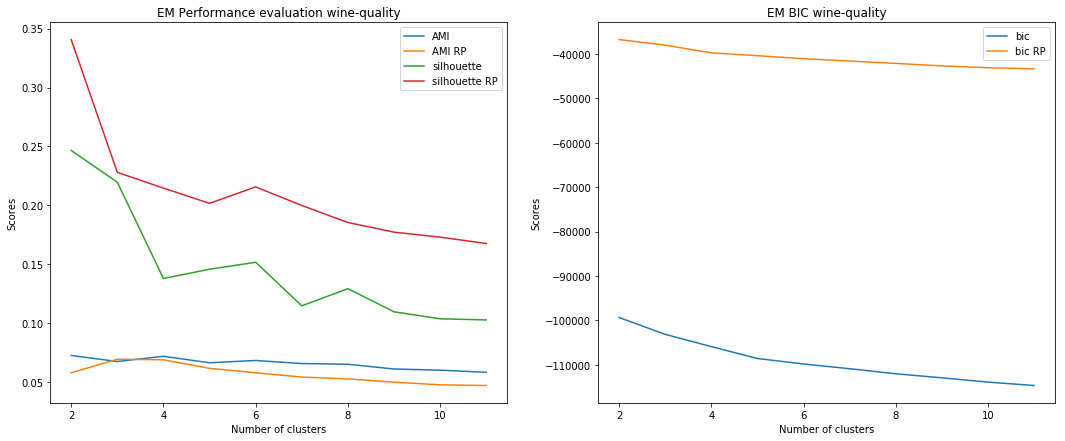

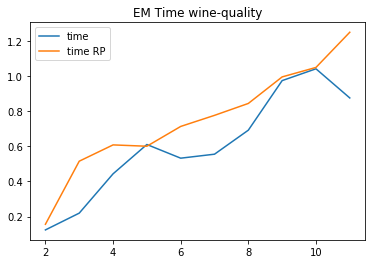

        AMI       ARI       NMI  accuracy            aic            bic  \
5  0.065826  0.042798  0.081983  0.171294 -111466.340671 -110881.648269   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
5       0.06772  0.224067     0.09925  gmm-em     0.128077           7   

   precision    recall  silhouette      time  v-measure  
5   0.333372  0.171294    0.114796  0.775357   0.080508  
------
        AMI      ARI      NMI  accuracy           aic           bic  \
5  0.054359  0.05033  0.06576  0.042466 -41962.634394 -41605.322371   

   completeness  f1_score  homogenity    init  mutual_info  n_clusters  \
5      0.056409   0.05501     0.07666  gmm-em     0.098925           7   

   precision    recall  silhouette      time  v-measure  
5   0.217335  0.042466     0.19994  0.554541   0.064994  


In [79]:
data = wdata
method = "RP"

# Reconstruction Error
dfr = reconstruction_error(cdata)
dfr.to_csv(f"./results/rerror_{method.lower()}_{data['name']}.csv", index=False )
plot_reconstruction_error(dfr)
          
# Reduce dimension
rp = GaussianRandomProjection(n_components=data['rp_n'])
rp.fit(data['X'])
reduced_data = rp.transform(data['X'])

# Performances
n_clusters_range = list(range(2, data['n_features']+1))

## Kmeans
dfk = performance_k_means(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfk.to_csv(f"./results/km_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_k_means_perf(data, reduced_data, n_clusters_range, method=method)

## EM
dfe = performance_em(reduced_data, 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfe.to_csv(f"./results/em_{method.lower()}_{data['name']}.csv", index=False )
reduced_data_em_perf(data, reduced_data, n_clusters_range, method=method)